## 질문) <br/><br/><span style="color:red">강남 학생들의 수능 점수가 다른 지역 학생들의 점수보다 뛰어난 이유는 학원을 많이 다녀서일까?</span>
- #### 먼저 강남 8학군 학생들과 다른 지역 학생들의 수능 점수와 평균 학원 개수에 대한 기초 통계를 보니 강남 8학군 학생들의 평균 점수가 다른 지역 <br/><br/>학생들의 점수보다 높아 보인다. <span style="color:blue"> (기술통계) </span>
- #### 과연 학원 개수가 증가하면 수능 점수도 향상하는가? <span style="color:blue">(상관관계 분석)</span>
- #### 분석 결과 상관관계가 크진 않았지만, 2022년도 이전과 이후 두 그룹으로 나누면 2022년도 이전까지는 강남 8학군 학생들의 학원 개수가 증가할수록 <br/><br/>수능 점수도 증가하는 것을 보였다. <span style="color:blue">(EDA)</span>
- #### 2022년도 이전과 이후 그룹을 나눠서 강남 8학군 학생과 다른 지역 학생들의 수능 점수를 차트로 보여주었다. <span style="color:blue">(시각화)</span>
- #### 하지만 우연한 결과 일 수 있으므로 가설검정을 통해 <span style="color:orange"> *'학원 개수가 증가할수록 수능 점수가 높아진다'* </span> 라는 가설의 진위를 테스트 했다. <span style="color:blue">(가설검정)</span>
- #### 가설검정을 통해 우연히 발생한 것이 아니라는 결과를 얻었고, 그렇다면 학원 개수가 한 개 더 증가할수록 대체 수능 점수에 얼마나 영향을 줬는지<br/><br/>  궁금해졌다. <span style="color:blue">(단순회귀분석)</span>
- #### 또한 학원 개수뿐 아니라 당연히 다른 요소도 수능 점수에 영향을 줄 것 같았고, 그중 하나로 수면 시간을 떠올려 학원 개수와 함께 수면 시간의<br/><br/> 영향력도 분석해 보았다. <span style="color:blue">(다중회귀분석)</span>
- #### 꼬리에 꼬리를 무는 추가 질문은 <span style="color:orange"> *'결국 학원 개수와 수면 시간이 어느정도 되어야 의대에 합격할 수 있는가'* </span> 다. 합격 여부를 예측하는 모델을 <br/><br/>만들어보았다. <span style="color:blue">(예측모델)</span>
- #### 마지막으로 강남 8학군 학생들이 공부하면서 어떤 것에 가장 관심이 많고, 의대를목표로 하는 이유가 무엇인지에 대한 설문조사 결과를 주제별로 <br/><br/>자동 분류해보았다. <span style="color:blue">(토픽모델링)</span>


##  1. 기본통계
### 1) 기술통계
- #### 기술통계는 데이터의 주요 특성과 패턴을 이해하는 데 도움이 되는 데이터에 대한 간결한 요약을 제공한다. 
- #### 데이터의 중심 경향과 변동성 및 분포를 분석하여 이상치를 식별하고, 데이터 품질을 결정, 기본 모집단에 대한 가설을 수립하는 데 도움이 된다.
- #### 레드 와인 품질 관련 데이터셋을 가져와서 기술통계를 연습해보자

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 변수 설명
- #### fixed acidity : 결합산
- #### volatile acidity : 휘발성 산도
- #### citric acid : 시트르산
- #### residual sugar : 잔류 당분
- #### chlorides : 염화물
- #### free sulfur dioxide : 유리 이산화황
- #### total sulfur dioxide : 총 이산화황
- #### density : 밀도
- #### pH : 산도
- #### sulphates : 황산염
- #### alcohol : 알콜 도수
- #### quality : 0 ~ 10(높을 수록 좋은 품질)

In [12]:
# Calculate descriptive statistics for each column
stats = df.describe().round(2)
print(stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.0

- #### 위의 결과에서 4개의 항목(range, var, skew, kurtosis)을 더 계산해서 붙여주자.

In [13]:
# Add additional statistics for each column
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
stats.loc['var'] = df.var().round(2) 
stats.loc['skew'] = df.skew().round(2)
stats.loc['kurtosis'] = df.kurtosis().round(2) #.round(2)는 소수점 이하 두자리로 반올림

# Print the results
print(stats)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
count           1599.00           1599.00      1599.00         1599.00   
mean               8.32              0.53         0.27            2.54   
std                1.74              0.18         0.19            1.41   
min                4.60              0.12         0.00            0.90   
25%                7.10              0.39         0.09            1.90   
50%                7.90              0.52         0.26            2.20   
75%                9.20              0.64         0.42            2.60   
max               15.90              1.58         1.00           15.50   
range             11.30              1.46         1.00           14.60   
var                3.03              0.03         0.04            1.99   
skew               0.98              0.67         0.32            4.54   
kurtosis           1.13              1.23        -0.79           28.62   

          chlorides  free sulfur diox

- #### 왜도 (skewness): 열에서 값 분포의 비대칭성을 측정하는 값. 양수 기울기는 데이터가 오른쪽으로 기울어져 있음을 나타내고 (오른쪽 꼬리가 더 길어짐), <br/><br/>음수 기울기는 데이터가 왼쪽으로 기울어져 있음을 표현(왼쪽 꼬리가 더 길어짐)

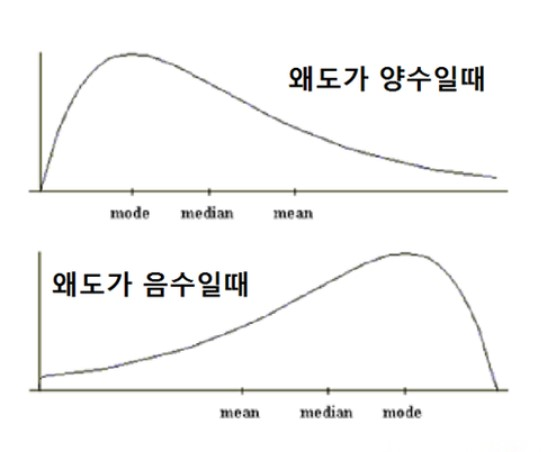

In [15]:
Image("C:/Users/katenam/DataDrivenReport/skewness.jpg")

- #### 첨도 (kurtois): 열에서 값 분포의 최고점을 측정하는 척도, 양수 첨도값은 데이터가 정규 분포보다 첨도가 높음을 나타내고, 음수 첨도값은 데이터가 <br/><br/>정규 분포보다 첨도가 낮음을 나타낸다.

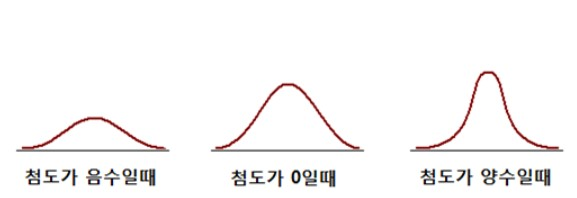

In [17]:
Image("C:/Users/katenam/DataDrivenReport/kurtosis.jpg")

- #### 왜도가 0 첨도가 1일 경우 완전한 정규분포라고 본다.
- #### Kline(2005)은 왜도의 기준을 절대값 3을 초과하지 않고, 첨도는 절대값 8또는 10을 초과하지 않으면 정규분포로 볼 수 있다고 제시하였다.

### 2) 상관관계
- #### 여러 변수간의 상관관계를 시각화하고 어떤 속성이 더 강하거나 약한 관계를 갖는지에 대한 인사이트를 얻어보자

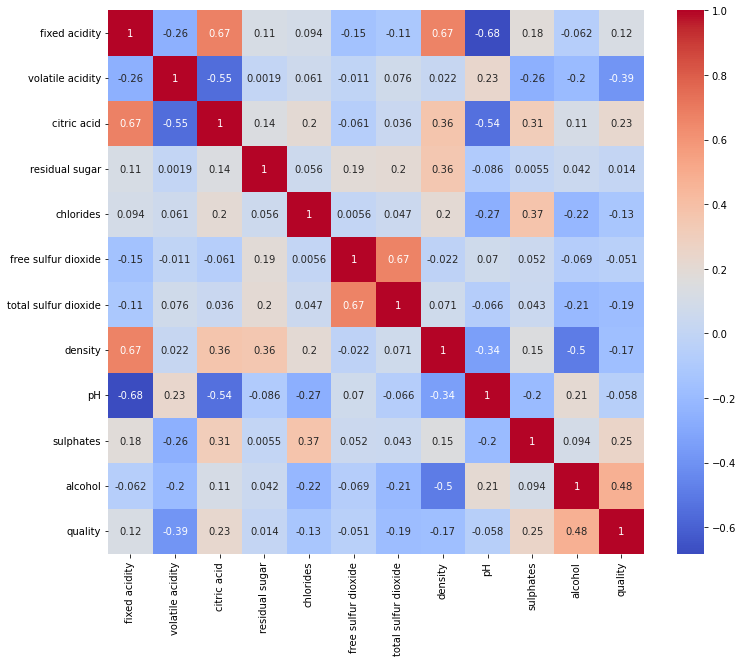

In [18]:
# compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- #### 위의 히트맵 결과 와인의 품질(quality)와 관련하여 alcohol 변수가 강한 양의 상관관계를 가지고 volatile acidity와 강한 음의 상관관계를 갖는다.
- #### 그러므로 와인의 품질을 예측할 때 고려해야 할 중요한 변수는 alcohol과 volatile acidity이다. 

## 2. 가설검정
### 1) 일표본 t-검정 (one sample t-test)
- #### 하나의 변수에 대한 측정값이며 표본 평균을 알려진 모집단 평균과 비교하는 데 사용되는 통계검정 방법이다. 
- #### 표본 평균과 모집단 평균 사이에 유의미한 차이가 있는지 판단하는 데 사용한다.

#### 예제)
- #### 특정 학교 학생의 평균 키가 전국 학생의 평균 키와 유의미한 차이가 있는지 알고 싶다고 가정해보자. 
- #### 일표본 t-검정을 사용하여 표본 평균(특정 학교 학생의 키)을 모집단 평균(전국 학생의 평균의 키)과 비교할 수 있다. 

#### 귀무가설: 특정 학교 학생의 평균 키가 전국 학생의 평균 키와 차이가 없다.
#### 대립가설: 특정 학교 학생의 평균 키가 전국 학생의 평균 키와 차이가 있다.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

In [2]:
heights = [165, 170, 175, 180, 165, 170, 165, 175, 170, 175, 180, 180, 165, 170, 170, 170, 175, 170, 175, 180]

In [3]:
sample_mean = np.mean(heights)
print("Sample mean:", sample_mean)

Sample mean: 172.25


In [ ]:
from scipy import stats

# Calculate sample mean and standard deviation
sample_mean = np.mean(heights)
sample_std = np.std(heights, ddof=1)

# Calculate the standard error
se = sample_std / np.sqrt(len(sample))

t_statistic = (sample_mean - population_mean) / se

print(t_statistic)

def calculate_one_sample_t_statistic(sample, population_mean):
    # Calculate sample mean and standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Use ddof=1 for sample standard deviation

    # Calculate the standard error
    se = sample_std / np.sqrt(len(sample))

    # Calculate the t-statistic
    t_statistic = (sample_mean - population_mean) / se

    return t_statistic

# Example usage:
sample = np.array([23, 25, 28, 32, 35])
population_mean = 30

t_statistic = calculate_one_sample_t_statistic(sample, population_mean)

# Degrees of freedom
df = len(sample) - 1

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))

print(f"One-sample T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


- #### 특정 학교에 재학 중인 학생 20명의 평균이 172.25cm라는 것을 알 수 있다.
- #### 그렇다면 전국 학생의 평균 키가 175cm라고 가정해보자. 표본 평균이 모집단 평균과 유의하게 다른지 확인하기 위해 일표본 t-검정을 수행한다.

In [4]:
t_statistic, p_value = ttest_1samp(heights, 175) 

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -2.3424076306982147
p-value: 0.03020119503702702


- #### t-검정통계량은 -2.34, p-값은 0.03이 나왔다.
- #### t-검정통계량은 표본 평균과 모집단 평균의 차이를 표준 오차 단위로 측정한 값이다.
- #### p-값은 귀무가설이 참이라고 가정할 때 관찰한 값보다 극단적이거나 더 극단적인 t-검정통계량을 얻을 확률이다.
- #### 이 예시에서 p-값이 0.05(일반적으로 사용되는 유의 수준)보다 작으므로 귀무가설을 기각하고 특정 학교 학생의 평균 키가 전국 학생의 평균 키와 <br/><br/>유의미하게 다른다는 결론을 내릴 수 있다.

#### 참고) 라이브러리 안쓰고 직접 풀어서 구한 코드

In [6]:
from scipy import stats

# Calculate sample mean and standard deviation
sample_mean = np.mean(heights)
sample_std = np.std(heights, ddof=1)

# Calculate the standard error
se = sample_std / np.sqrt(len(heights))

population_mean = 175
t_statistic = (sample_mean - population_mean) / se

# Degrees of freedom
df = len(heights) - 1

p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -2.3424076306982147
p-value: 0.030201195037026896


### 2) 이표본 t-검정 (two sample t-test)
- #### 두 개의 변수에 대한 측정값
- #### 두 개의 독립적인 모집단에서 추출된 표본을 이용하여 두 집단의 모평균을 비교하는 검정이다.

- #### 두 학생 그룹인 A그룹과 B그룹의 평균 키를 비교한다고 가정해보자. 
- #### 평균 160cm, 표준편차 10cm인 그룹 A에 대해 30개의 키 데이터를 랜덤으로 생성하고 평균 170cm, 표준편차 8cm인 그룹 B에 대해 25개의 키 데이터를 <br/><br/> 랜덤으로 생성한 다음 이 두 그룹의 평균 키에 통계적으로 유의미한 차이가 있는지 확인해보자.

In [7]:
np.random.seed(14)

#Generate heights for Group A and Group B
group_a_heights = np.random.normal(160, 10, 30)
group_b_heights = np.random.normal(170, 8, 25)

- #### t-검정통계량은 두 그룹의 평균 차이를 나타내고 평균 오차로 표준화된다.
- #### t-검정통계량이 0보다 크면 그룹 A가 그룹 B보다 평균이 더 높음을 나타내고 0보다 작으면 그룹 B가 그룹 A보다 평균이 더 높음을 나타낸다. 
- #### p-값은 귀무가설(두 그룹 평균 사이에 차이가 없다)이 참이라고 가정할 때 계산된 것과 같은 극단적인 t-검정통계량이 관찰될 확률을 나타낸다. 
- #### p-값이 작으면 (일반적으로 0.05미만) 관찰된 평균 차이가 우연에 의한 것일 가능성이 낮다는 것을 나타내므로 귀무가설을 기각한다. 

In [8]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_val = ttest_ind(group_a_heights,
group_b_heights)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -3.069892982872516
P-value: 0.0033731880990274534


#### 결과)
- #### t-검정통계량이 -3.07이고 p-값이 0.0034. 이는 그룹 B의 평균 키가 그룹 A의 평균 키보다 유의 수준 0.05에서 유의미하게 높다는 것을 의미한다.
- #### 딸라서 두 그룹의 키에 통계쩍으로 유의미한 차이가 있따는 결론을 내릴 수 있다. 

### 3) 대응표본 t-검정 (paired sample t-test)
- #### 두 개의 관련된 변수에 대한 측정값
- #### 서로 대응되는 집단간 차이를 분석하는 방법이다.

#### 예제)
- #### 새로운 교육 프로그램이 특정 업무에서 직원의 성과를 향상시킨다는가설을  테스트하고 싶다고 가정해보자.
- #### 교육 프로그램 전후에 직원 10명의 성과를 측정하고 점수에 유의미한 차이가 있는지 확인하고자 한다.
- #### 이를 위해 대응표본 t-검정을 사용할 수 있다. 

In [1]:
import numpy as np
from scipy.stats import ttest_rel

before_scores = np.array([62, 75, 85, 79, 67, 74, 80, 60, 65, 72])
after_scores = np.array([72, 78, 91, 85, 70, 80, 88, 65, 70, 82])

t_statistic, p_value = ttest_rel(before_scores, after_scores)

print("t-statistic:", t_statistic)
print(f"p-값:{p_value:0.5f}") # print 다음에 나오는 f는 f-string 포맷이라고 하는데 중괄호 ({}) 안의 변수를 내가 원하는 방식으로 출력할 때 쓰인다.

t-statistic: -7.8881570460237285
p-값:0.00002


#### 결과)
- #### t-검정통계량이 -7.88, p-값 0.00002 이므로 귀무가설을 기각하고 교육 프로그램 전후에 직원 성관에 유의미한 차이가 있다는 결론을 내릴 수 있다. 

### 4) 카이제곱검정 (chi-squred test)
- #### 두 개 이상의 범주형 변수에 대한 도수 분포
- #### 관찰된 빈도가 기대되는 빈도와 유의하게 다른지를 검증하는 방법이다.

#### 예제)
- #### 새로운 광고 캠페인이 A 제품에 대한 고객의 선호도에 영향을 미친다는 가설을 테스트하고 싶다고 가정해보자.
- #### 광고 캠페인 전후에 100명의 고객을 대상으로 설문조사를 실시하여 제품 선호 여부를 조사하면서, A 제품을 선호하는 고객의 비율에 유의미한 <br/><br/> 차이가 있는지 확인하고자 한다.
- #### 이를 위해 카이제곱검정을 사용한다.

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

before = np.array([35, 65])
after = np.array([55, 45])

observed = np.array([before, after])

chi2_statistic, p_value, dof, expected = chi2_contingency(observed)

print("chi-제곱 통계:", chi2_statistic)
print("p-값:", p_value)

chi-제곱 통계: 7.292929292929292
p-값: 0.006922651100971638


#### 결과)
- #### p-값이 0.05 미만 (95% 신뢰 수준 가정)이므로 귀무가설을 기각하고 광고 캠페인 전후에 제품을 선호하는 고객의 비율에 유의미한 차이가 있다.

### 5) 분산분석검정 (ANOVA)
- #### 하나의 연속형 변수와 하나 이상의 범주형 변수에 대한 측정값
- #### 3개 이상의 그룹 평균 간에 유의미한 차이가 있는지 확인하는데 사용하는 검정 방식

#### 예제)
- #### 키우고 있는 식물이 a, b, c 세 그룹으로 나뉘어 있다고 가정해보자. 각 그룹에 있는 식물의 평균 높이에 차이가 있는지 알고싶다. 
- #### 이를 위해 분산분석 검정을 한다. 

- #### 분산분석검정을 수행하려면 먼저 각 그룹에서 각 식물의 키를 측정한다.
- #### 그런 다음 각 그룹에 있는 식물의 평균 높이를 계산하고 모든 식물의 키 변화를 계산한다.
- #### 다음으로 F-검정통계량이라는 것을 계산하여 높이 변화 중 얼마나 많은 부분이 그룹 간의 차이로 인한 것인지, <br/><br/> 그리고 얼마나 많은 부분이 그룹 내의 차이로 인한 것인지를 알 수 있다.
- #### F-검정통계량이 충분히 크면 그룹의 평균에 유의미한 차이가 있다는 결론을 내릴 수 있다.
- #### 이는 그룹 간의 키 타이가 우연에 의한 것이 아니라는 것을 의미한다. 

In [2]:
import scipy.stats as stats

# define the data
group_a = [10, 12, 13, 14, 15]
group_b = [12, 13, 14, 15, 16]
group_c = [14, 15, 16, 17, 18]

# perform the ANOVA test
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

# print the results
print("F statistic:", f_statistic)
print("P-value:", p_value)

F statistic: 4.5057471264367805
P-value: 0.034701307888476286


## 3. 선형회귀분석
### 1) 단순선형회귀(simple linear regression)


#### 예제)
- #### 일주일에 학원을 가는 횟수와 수능 성적 사이에 관계가 있는지 알고 싶다고 가정해보자. 
- #### 시험 점수(exam_score)를 종속변수로 학원 개수(num_tutors)를 독립변수 하나로 넣어보자.

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# Create a DataFrame with the dependent variable and independent variables
data = {'exam_score': [85, 72, 90, 65, 78, 87, 92, 80, 75, 84],
        'num_tutors': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1]}
df = pd.DataFrame(data)

# Fit a multiple linear regression model
model = smf.ols('exam_score ~ num_tutors', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.113
Method:                 Least Squares   F-statistic:                   0.08391
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.779
Time:                        16:53:07   Log-Likelihood:                -34.975
No. Observations:                  10   AIC:                             73.95
Df Residuals:                       8   BIC:                             74.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.9275      7.055     11.188      0.0

C:\Users\katenam\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\katenam\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\katenam\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\katenam\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- #### smf.ols는 최소제곱법(ordinary least squares)라는 선형회귀분석 방법이다.
- #### fit()은 모델은 fitting하는 함수이며 이를 통해 모델이 데이터에 적합하도록 계수를 추정한다.

#### 결과)
- #### num_tutors 변수의 p-값이 0.05보다 훨씬 큰 0.779이다. 
- #### 학원 개수(num_tutors)와 시험 점수(exam_score)간의 관계가 통계적으로 유의미하지 않다는 것을 나타낸다. 

### 2) 다중선형회귀(multiple linear regression)

In [3]:
import statsmodels.formula.api as smf

# Create a DataFrame with the dependent variable and independent variables
data = {'exam_score': [85, 72, 90, 65, 78, 87, 92, 80, 75, 84],
        'num_tutors': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
        'family_wealth': [50000, 75000, 100000, 30000, 50000, 70000, 100000, 80000, 60000, 90000]}
df = pd.DataFrame(data)

# Fit a multiple linear regression model
model = smf.ols('exam_score ~ num_tutors + family_wealth', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     3.972
Date:                Fri, 08 Dec 2023   Prob (F-statistic):             0.0703
Time:                        16:53:11   Log-Likelihood:                -31.235
No. Observations:                  10   AIC:                             68.47
Df Residuals:                       7   BIC:                             69.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        62.2891      7.903      7.881

C:\Users\katenam\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\katenam\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\katenam\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\katenam\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\katenam\App

#### 결과)
- #### num_tutors 변수의 p-값은 0.94로 유의수준 0.05보다 크기때문에 exam_score와의 관계가 유의미하다고 볼 수 없지만, <br/><br/> 재산의 계수는 0.0003이고, p-값이 유의 수준 0.05보다 작은 0.027이므로 재산과 시험 점수 간의 관계는 통계적으로 유의미하다고 볼 수 있다.
- #### 즉, 재산이 한 단위 증가 시 시험 점수는 0.0003점 올라간다고 할 수 있다.

## 4. 분류예측모델
- #### 선형회귀분석은 유용하지만 종속변수 데이터가 연속형 데이터인 경우에만 쓸 수 있다는 점에서의 한계까 있다.
- #### 종속변수가 합격/불합격 여부처럼 이진형 변수인 경우에는 선형회귀를 적용 할 수 없다는 뜻이다.

### 1) 로지스틱 회귀 (Logistic regression)
- #### 예측 분석을 위한 회귀분석 중에서 특히 종속 변수가 이분형일 때 수행할 수 있는 회귀 분석 기법의 한 종류이다.
- #### 로지스틱 회귀는 어떤 사람이 시험에 합격할지 불합격할지와 같이 두 가지 이상의 가능성 있는 결과를 예측하는 데 관심이 있다. 
- #### 이를 위해 시그모이드(sigmoid) 함수라는 특수 함수를 사용한다. 
- #### 시그모이드 함수는 음의 무한대부터 양의 무한대까지의 값을 가지는 입력변수를 0부터 1사이의 값을 가지는 출력 변수로 변화하는 함수
- #### 예를 들어 어떤 사람이 공부한 시간을 기준으로 시험에 합격할지 불합격할지 예측하고 싵다고 한다면 로지스틱 회귀를 사용하여 공부한 시간을 고려하여 <br/><br/> 시험에 합격할 확률을 예측하는 모델을 만들 수 있다.
- #### 예측된 확률이 특정 임계값 이상이면 그 사람이 시험에 합격할 가능성이 높고, 임계값 미만이면 불합격할 가능성이 높다고 말할 수 있다.

#### 방법)
#### a. 데이터 분리
- #### 예측을 할 때는 데이터를 훈련 데이터와 테스트 데이터로 나눠준다.

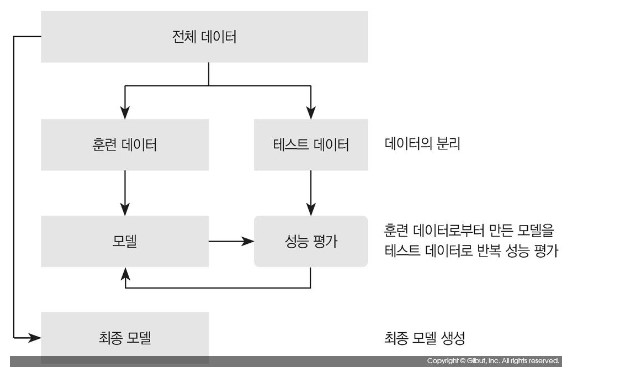

In [12]:
from IPython.display import Image
Image("C:/Users/katenam/DataDrivenReport/splitdata.jpg")

#### b.모델 정확도 측정
- #### 혼동행렬(confusion matrix) 
- #### ROC곡선

#### 예제 직접 만들어 사용)
- #### 공부 시간(time_studied)과 평균 수면 시간(avg_sleep_hours) 및 합격 여부(pass)라는 세 가지 변수가 포함된 데이터셋을 만든다.
- #### np.random.seed(42)는 넘파이 라이브러리에서 난수 생성기를 만드는 것이다.
- #### 공부 시간(time_studied)과 평균 수면 시간(avg_sleep_hours)을 각각 1천 개씩 무작위로 생성하고 합격 여부(passing)는 시그모이드 함수를 활용하여 <br/><br/> 1과 0으로 구분해서 생성했다.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# create a dataset with two variables
np.random.seed(42)
time_studied = np.random.randint(0, 10, 1000)
avg_sleep_hours = np.random.uniform(4, 10, 1000)
passing = np.random.binomial(1, 1 / (1 + np.exp(-time_studied + 2 * avg_sleep_hours - 10)))  # sigmoid function
df = pd.DataFrame({'time_studied': time_studied, 'avg_sleep_hours': avg_sleep_hours, 'passing': passing})

In [3]:
time_studied

array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4, 3, 7, 7, 2, 5, 4, 1, 7, 5, 1, 4, 0,
       9, 5, 8, 0, 9, 2, 6, 3, 8, 2, 4, 2, 6, 4, 8, 6, 1, 3, 8, 1, 9, 8,
       9, 4, 1, 3, 6, 7, 2, 0, 3, 1, 7, 3, 1, 5, 5, 9, 3, 5, 1, 9, 1, 9,
       3, 7, 6, 8, 7, 4, 1, 4, 7, 9, 8, 8, 0, 8, 6, 8, 7, 0, 7, 7, 2, 0,
       7, 2, 2, 0, 4, 9, 6, 9, 8, 6, 8, 7, 1, 0, 6, 6, 7, 4, 2, 7, 5, 2,
       0, 2, 4, 2, 0, 4, 9, 6, 6, 8, 9, 9, 2, 6, 0, 3, 3, 4, 6, 6, 3, 6,
       2, 5, 1, 9, 8, 4, 5, 3, 9, 6, 8, 6, 0, 0, 8, 8, 3, 8, 2, 6, 5, 7,
       8, 4, 0, 2, 9, 7, 5, 7, 8, 3, 0, 0, 9, 3, 6, 1, 2, 0, 4, 0, 7, 0,
       0, 1, 1, 5, 6, 4, 0, 0, 2, 1, 4, 9, 5, 6, 3, 6, 7, 0, 5, 7, 4, 3,
       1, 5, 5, 0, 8, 5, 2, 3, 3, 2, 9, 2, 2, 3, 6, 3, 8, 0, 7, 6, 1, 7,
       0, 8, 8, 1, 6, 9, 2, 6, 9, 8, 3, 0, 1, 0, 4, 4, 6, 8, 8, 2, 2, 2,
       3, 7, 5, 7, 0, 7, 3, 0, 7, 3, 5, 7, 3, 2, 8, 2, 8, 1, 1, 1, 5, 2,
       8, 3, 0, 3, 0, 4, 3, 7, 7, 6, 2, 0, 0, 2, 5, 6, 5, 5, 5, 2, 5, 7,
       1, 4, 0, 0, 4, 2, 3, 2, 0, 0, 4, 5, 2, 8, 4,

- #### 이제 데이터셋을 훈련 세트와 테스트 세트의 두 부분으로 분할한다. 
- #### 독립변수(features)는 공부 시간(time_studied)과 평균 수면 시간(avg_sleep_hours)을 포함하는 x에 저장되고 종속변수(target)는 합격 여부(passing)인<br/><br/> y에 저장된다.

In [4]:
# split the dataset into training and testing sets
X = df[['time_studied', 'avg_sleep_hours']]
y = df['passing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- #### 그 다음으로 두 가지 다른 로지스틱회귀 모델을 만들어 보고 비교해보자.
- #### 첫 번째 모델인 model1은 공부 시간(time_studied)라는 하나의 독립변수로 단순회귀모형을 만든 것이다. 
- #### 두 번째 모델인 model2는 두 독립변수 공부 시간(time_studied)과 평균 수면 시간(avg_sleep_hours)으로 적합시켰다.

In [8]:
# fit logistic regression models with one and two variables
model1 = LogisticRegression()
model1.fit(X_train[['time_studied']], y_train)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

- #### 훈련된 로지스틱회귀 모델을 사용하여 테스트 데이터를 예측해본다.
- #### 첫 번째 모델(model1)은 공부 시간만 사용하여 결과를 예측, 두 번째(model2)은 공부 시간과 평균 수면 시간을 모두 사용하여 결과를 예측한다.
- #### 예측값은 y_pred1, y_pred2 변수에 저장한다.

In [9]:
import warnings
warnings.filterwarnings("ignore")

# predict whether a person will pass or fail based on time studied and avg_sleep_hours
y_pred1 = model1.predict(X_test[['time_studied']])
y_pred2 = model2.predict(X_test)

- #### 그 다음 학습한 로지스틱회귀 모델의 정확도를 계산한다. 
- #### y_test에는 테스트 세트의 실제 정답이 있고, y_pred1과 y_pred2에는 모델에서 만든 예측값들이 있다.
- #### accuracy1에는 테스트 세트의 실제 정답과 공부 시간만으로 만든 모델의 예측값을 비교한 정확도가 계산되어 나오고, <br/><br/>accuracy2네는 테스트 세트의 실제 정답과 공부 시간 과 평균 수면 시간으로 만든 모델의 예측 값을 비교한 정확도가 계산되어 나온다.

In [10]:
# calculate accuracy and confusion matrix
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

- #### 그 다음에 모델 평가를 위해 정확도를 구했던 방식과 똑같이 혼동행렬을 작성한다. 그리고 ROC curve를 그려보고 AUC score를 구해본다.

In [11]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

In [12]:
# calculate ROC curve and AUC score
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test[['time_studied']])[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict_proba(X_test)[:, 1])

auc1 = roc_auc_score(y_test, model1.predict_proba(X_test[['time_studied']])[:, 1])
auc2 = roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])

In [13]:
print('Model with time studied only:')
print('Accuracy:', accuracy1)
print('Confusion Matrix:', cm1)
print('AUC:', auc1)

print('Model with time studied and avg_sleep_hours:')
print('Accuracy:', accuracy2)
print('Confusion Matrix:', cm2)
print('AUC:', auc2)

Model with time studied only:
Accuracy: 0.7266666666666667
Confusion Matrix: [[ 83  48]
 [ 34 135]]
AUC: 0.7884050770134152
Model with time studied and avg_sleep_hours:
Accuracy: 0.8933333333333333
Confusion Matrix: [[118  13]
 [ 19 150]]
AUC: 0.9595736031437735


#### 결과)
- #### model1의 정확도는 72.7%, model2의 정확도는 78.8%로 model2가 더 높다.
- #### 혼동 행렬에서도 행렬의 TP 좌표(0,0)와 TN 좌표(1,1)의 절대값은 model1 (TP=83, TN=135), model2 (TP=118, TN=150)으로 model2가 크다.

- #### 마지막으로 시각화로 정확도를 비교해보기 위해 ROC 곡선을 그려 본다.

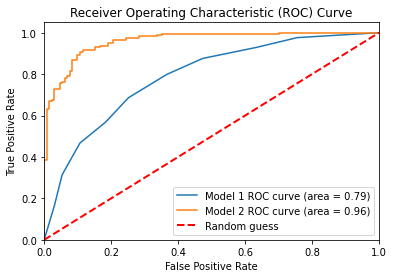

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC curve for the model with only "study_hours"
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, label='Model 1 ROC curve (area = %0.2f)' % roc_auc1)

# ROC curve for the model with "study_hours" and "sleep_hours"
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc2)

# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 해석)
- #### model2이 model1qhek AUC가 더 높은 것을 위의 결과에서 알 수 있었고, 그래프에서 보듯이 ROC curve 또한 더 1에 가까운 값을 가진다.
- #### 그러므로 model2의 예측 정확도가 높다.

### 2) 랜덤포레스트(Random forest)
- #### 랜덤포레스트는 의사결정나무(decision tree)를 여러 개 합쳐서 만든 알고리즘이다. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:, 1])

print('Accuracy:', accuracy)

Accuracy: 0.8933333333333333


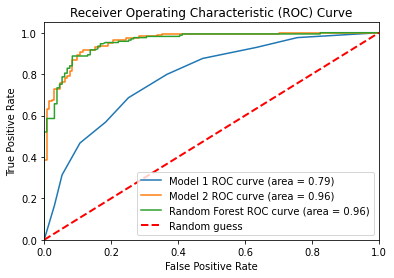

In [17]:
# ROC curve for the model with "study_hours" and "sleep_hours" with Random Forests
roc_auc2 = auc(fpr2, tpr2)

roc_auc3 = auc(fpr3, tpr3)

plt.plot(fpr1, tpr1, label='Model 1 ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest ROC curve (area = %0.2f)' % roc_auc3)


# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()